----------
**Kaggle Mini-Project II: Modeling**
=====================================
https://www.kaggle.com/maurerm/kaggleproject-part-2-modeling

Maggie Maurer

CoderGirl, DataScience Cohort

July 2019

----------

- <a href=''>Statistics Review</a>  
- <a href='#1'>1. Libraries and Data</a>  
    - <a href='#1.1'>1.1. Loding Libraries</a> 
    - <a href='#1.2'>1.2. Reading and Cleaning Data</a>
- <a href='#2'>2. Paired T-Test</a>  
- <a href='#3'>3. Machiene Learning Preprocessing</a>  
    - <a href='#3.1'>3.1. One Hot Encoding/ Splitting Dependent and Independent Variables</a> 
    - <a href='#3.2'>3.2. Scale the Data</a> 
    - <a href='#3.3'>3.3. Train/Test Split</a>    
- <a href='#4'>4. Supervised Learning</a>  
    - <a href='#4.1'>4.1. Logistic Regression</a> 
    - <a href='#4.2'>4.2. K-Nearest Neighbors</a> 
    - <a href='#4.3'>4.3. Decision Tree</a>
    - <a href='#4.4'>4.4. AdaBoost with Decision Tree Base</a> 
    - <a href='#4.5'>4.5. Random Forest</a>     
    - <a href='#4.6'>4.6. XGBoost</a> 
- <a href=‘#5’>5. Comparing the Models</a>  
    - <a href=‘#5.1’>5.1. Assesing the Model of Best Fit</a> 
- <a id=‘#6’>6. Note About One Hot Encoding</a> 

# <a id=''>Statistics Review</a> 

In [132]:
#Data Analysis Libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import statistics as st
import math
import os
from datetime import datetime

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
from IPython.display import display
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
%matplotlib inline
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

#sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score,confusion_matrix, classification_report, confusion_matrix, jaccard_similarity_score, f1_score, fbeta_score

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Imputer,MinMaxScaler

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score, validation_curve, RandomizedSearchCV, cross_val_predict

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor

from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier

from sklearn import datasets

#misc
from functools import singledispatch
import eli5
from eli5.sklearn import PermutationImportance
import shap
from mpl_toolkits.mplot3d import Axes3D
import os
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("../input"))
import itertools
from xgboost import XGBClassifier

heart = pd.read_csv("../input/heart.csv")
heart2= heart.drop(heart.index[164])

heart2.columns=['age', 'sex', 'cpain','resting_BP', 'chol', 'fasting_BS', 'resting_EKG', 
                'max_HR', 'exercise_ANG', 'ST_depression', 'm_exercise_ST', 'no_maj_vessels', 'thal', 'target']

heart2['chol']=heart2['chol'].replace([417, 564], 240)
heart2['chol']=heart2['chol'].replace([407, 409], 249)

heart2['ST_depressionAB']=heart2['ST_depression'].apply(lambda row: 1 if row > 0 else 0)
heart2A=heart2.iloc[:,0:11]
heart2B=heart2.iloc[:,11:14]
heart2C=heart2.loc[:,'ST_depressionAB']
heart2C=pd.DataFrame(heart2C)
heart2C.head()
heart2 = pd.concat([heart2A, heart2C, heart2B], axis=1, join_axes=[heart2A.index])

heart2.loc[48, 'thal']=2.0
heart2.loc[281, 'thal']=3.0

#seperate independent (feature) and dependent (target) variables
#KNN cannot process text/ categorical data unless they are be converted to numbers
#For this reason I did not input the heart3 DataFrame created above
X=heart2.drop('target',1)
y=heart2.loc[:,'target']

#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y,test_size=.2,random_state=40)

#Call classifier and, using GridSearchCV, find the best parameters
knn = KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}
modelKNN = GridSearchCV(knn,params,cv=10)
modelKNN.fit(X_train,y_train)
modelKNN.best_params_   

#Use the above model (modelKNN) to predict the y values corresponding to the X testing set
predictKNN = modelKNN.predict(X_test)

#Compare the results of the model's predictions (predictKNN) to the actual y values
accscoreKNN=accuracy_score(y_test,predictKNN)

['heart.csv']


## <a id=''>Confusion Matricies</a> 

Confusion Matrix:
[[23  3]
 [ 1 34]]

True Positive:	34
True Negative:	23
False Positive:	3
False Negative:	1


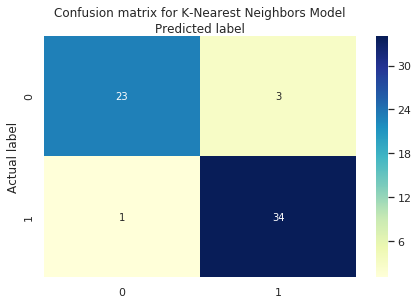

In [133]:
conf_matrixKNN = confusion_matrix(y_test,predictKNN)

print('Confusion Matrix:\n{}\n'.format(conf_matrixKNN))
print('True Positive:\t{}'.format(conf_matrixKNN[1,1]))
print('True Negative:\t{}'.format(conf_matrixKNN[0,0]))
print('False Positive:\t{}'.format(conf_matrixKNN[0,1]))
print('False Negative:\t{}'.format(conf_matrixKNN[1,0]))

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(conf_matrixKNN), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for K-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

A confusion matrix shows how many correctly predicted values there were, as well as how many incorrectly predicted.  The incorrectly predicted values are split into False Positives and False Negatives.

* False Positives are where the model predicted a target value of 1 (prescence of Heart Disease), but the patient was not diagnosed with Heart Disease in real life
* False Positives are where the model predicted a target value of 0 (absence of Heart Disease), but the patient was diagnosed with Heart Disease in real life

This model is pretty accurate.  
It gives 3 False Positives and 1 False Negative.

Let's look at the Sensitivity and Specificity

\begin{align}
Sensitivity = \frac{True\:Positives}{True\:Positives + False\:Negatives}
\end{align}

\begin{align}
Specificity = \frac{True\:Negatives}{True\:Negatives + False\:Positives}
\end{align}



The closer the Sensitivity and Specificity are to 1, the better fit the model is.

In [134]:
total=sum(sum(conf_matrixKNN))

sensitivityKNN = conf_matrixKNN[1,1]/(conf_matrixKNN[1,1]+conf_matrixKNN[1,0])
print('Sensitivity : ', sensitivityKNN)

specificityKNN = conf_matrixKNN[0,0]/(conf_matrixKNN[0,0]+conf_matrixKNN[0,1])
print('Specificity : ', specificityKNN)

Sensitivity :  0.9714285714285714
Specificity :  0.8846153846153846


## <a id=‘#’>F1 Score</a>

The F1 score is a measure of how accurate a model is. It is determined by examining both the precision and recall of the model.  

* Precision is the number of correct positive results divided by the number of all positive results

\begin{align}
Precision = \frac{True\:Positives}{True\:Positives + False\:Positives}
\end{align}


* Recall is the number of correct positive results divided by the number of positive results that should have been returned, had the model been 100% accurate

\begin{align}
Recall = \frac{True\:Negatives}{True\:Positives + False\:Negatives}
\end{align}

* The F1 score:

\begin{align}
F1 = 2* \frac{Precision * Recall}{Precision + Recall}
\end{align}

The F1 score of my KNN model is as follows:

In [135]:
KNNF1=metrics.f1_score(y_test,predictKNN)
print(classification_report(y_test,predictKNN))
print("F1 Score:" ,round((100*KNNF1),2))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.92      0.97      0.94        35

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61

F1 Score: 94.44


F1 score is quite high for this model, incidating that this model is highly accurate.

## <a id=‘#’>Reciever Operator Curve and the Area Under the Curve</a>

The area under the ROC curve ( AUC ) is a measure of how well a model can distinguish between two diagnostic groups (diseased/normal).

AUC can be generally classed as follows:

* 0.90 - 1.00 = excellent
* 0.80 - 0.90 = good
* 0.70 - 0.80 = fair
* 0.60 - 0.70 = poor
* 0.50 - 0.60 = fail


Area under the curve: 0.9637362637362638


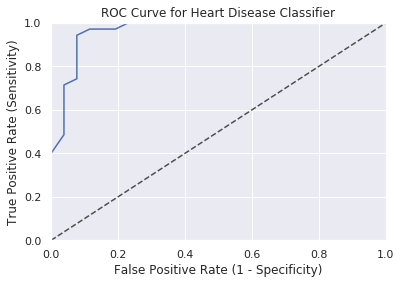

In [136]:
predictKNN_quant = modelKNN.predict_proba(X_test)[:, 1]

fprKNN, tprKNN, thresholds = roc_curve(y_test, predictKNN_quant)

fig, ax = plt.subplots()
ax.plot(fprKNN, tprKNN)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

aucKNN=auc(fprKNN, tprKNN)
print("Area under the curve:", aucKNN)


So, the area under the curve indicates that this model can distinguish between those not diagnosis with Heart Disease and those diagnosed very well!

### <a id=‘#’>Cross Validation and R2 Scores</a>

The Train/Test Split function I will be using (and did use for this dummy model) does have it's danger.  For example, if the split is not random.  For example, if the split included all of most of the patients showing left ventricular hypertrophy it could cause out data to be overfit.

One way to fight overfitting it to use cross-validation and R2 scores.  In both of those measures, it reduces the potential bias and overfitting created from utilizing only one random seed.

Scikit learn's cross_val_score function returns mutliple cross validated accuracy scores.  I then took the mean of these scores to predict how accurate my model truley was. 


In [137]:
KNNscores = cross_val_score(modelKNN, X_scaled, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (KNNscores.mean(), KNNscores.std() * 2))
print ('Cross_validated scores:', KNNscores)

Accuracy: 0.81 (+/- 0.08)
Cross_validated scores: [0.81967213 0.86885246 0.7704918  0.85       0.76271186]


I also examined the R2 score.  The R2 score is defined as the proportion of variance in the dependent variable that is predictable from the independent variables.  So, the closer to 1 the R2 value is, the better the model explains/predicts the variation in the data.

In [138]:
KNNR2 = metrics.r2_score(y_test,predictKNN)
print ('R2:', KNNR2)

R2: 0.7318681318681319


Neither the cross validation, nor the R2 score are amazing.  The cross validation score show that some of the accuracy in the model is due to likely due to overfitting/ bias created from the train/test split action.

Keep these statistical test in mind as I run through the Machiene Learning algorithms below!

# <a id='1'>1. Librairies and data</a> 

## <a id='1.1'>1.1. Loading libraries</a> 

In [139]:
#Data Analysis Libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import statistics as st
import math
import os
from datetime import datetime

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
from IPython.display import display
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
%matplotlib inline
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

#sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score,confusion_matrix, classification_report, confusion_matrix, jaccard_similarity_score, f1_score, fbeta_score

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Imputer,MinMaxScaler

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score, validation_curve, RandomizedSearchCV, cross_val_predict

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor

from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier

from sklearn import datasets

#misc
from functools import singledispatch
import eli5
from eli5.sklearn import PermutationImportance
import shap
from mpl_toolkits.mplot3d import Axes3D
import os
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("../input"))
import itertools
from xgboost import XGBClassifier

['heart.csv']


## <a id='1.2'>1.2. Reading and Cleaning Data</a> 

In [140]:
heart = pd.read_csv("../input/heart.csv")

Change DataFrame to match preprocessing changes made in [Part 1](https://www.kaggle.com/maurerm/kaggleproject-part-1-exploratory-data-analysis) of this Kaggle Assignment.

In [141]:
heart2= heart.drop(heart.index[164])

heart2.columns=['age', 'sex', 'cpain','resting_BP', 'chol', 'fasting_BS', 'resting_EKG', 
                'max_HR', 'exercise_ANG', 'ST_depression', 'm_exercise_ST', 'no_maj_vessels', 'thal', 'target']

heart2['chol']=heart2['chol'].replace([417, 564], 240)
heart2['chol']=heart2['chol'].replace([407, 409], 249)

heart2['ST_depressionAB']=heart2['ST_depression'].apply(lambda row: 1 if row > 0 else 0)
heart2A=heart2.iloc[:,0:11]
heart2B=heart2.iloc[:,11:14]
heart2C=heart2.loc[:,'ST_depressionAB']
heart2C=pd.DataFrame(heart2C)
heart2C.head()
heart2 = pd.concat([heart2A, heart2C, heart2B], axis=1, join_axes=[heart2A.index])

heart2.loc[48, 'thal']=2.0
heart2.loc[281, 'thal']=3.0

# <a id='#2'>2. Paired T-Test</a> 

I am only going to run the paired T-Test on the quantitative features.  As the discrete feautes have, at maximum, 5 discrete values, comparing their means would not provide meaningful information.  

In [142]:
PHD=heart2.loc[heart2.loc[:,"target"]==1]
AHD=heart2.loc[heart2.loc[:,"target"]==0]

from scipy.stats import ttest_ind
def rowz(ttest): 
    name=ttest_ind(PHD[ttest], AHD[ttest])
    name=list(name)
    name = pd.DataFrame(np.array(name))
    name=name.T
    col=["t-statistic", "p_value"]
    name.columns=col
    return name

AGE=rowz('age')
AGE.loc[:,"Names"]="Age"
RESTING_BP=rowz('resting_BP')
RESTING_BP.loc[:,"Names"]="Resting_BP"
CHOLESTEROL=rowz('chol')
CHOLESTEROL.loc[:,"Names"]="Cholesterol"
MAX_HR=rowz('max_HR')
MAX_HR.loc[:,"Names"]="Max_HR"
ST_DEP=rowz('ST_depression')
ST_DEP.loc[:,"Names"]="ST_Depression"

PVALS = pd.concat([AGE, RESTING_BP,CHOLESTEROL,MAX_HR, ST_DEP], axis=0)
PVALS=PVALS.set_index(PVALS["Names"])
P_VALS= PVALS.drop('Names',axis=1)

P_VALS

,t-statistic,p_value
Names,,
Age,-3.933766,1.039484e-04
Resting_BP,-2.560991,1.092654e-02
Cholesterol,-1.757486,7.985488e-02
Max_HR,8.014848,2.476146e-14
ST_Depression,-8.229334,5.814567e-15


As we can see, almost all of the p-values are significant (<0.05).
* ST_Depression: 0.000000000000005815
* Maximum Heart Rate: 0.00000000000002476
* Age: 0.001039
* Resting Blood Pressure: 0.010927

The only non-significant p-value is cholesterol (0.07985).


This means that for ST depression, maximum heart rate, age, and resting blood pressure there is less than a 5% chance that the differences between the target sample^ means could have occured by chance  alone.
   
   ^ Target Sample: Absence or presence of heart disease

# <a id=‘#3’>3. Machiene Learning Preprocessing</a> 

## <a id='#3.1'>3.1. One Hot Encoding/ Splitting Dependent and Independent Variables</a>

DataFrames must be preprocessed before they can be analyzed by Machiene Learning algorithms.  

This is because Machiene Learning algorithms cannot process text/ categorical data unless they have be converted to numbers.  For this reason I did not input the heart3 DataFrame created in Part 1 of the Kaggle Assignment.

Furthermore, Machiene Learning Algorithms need the data to be split into the independent and dependant variable, as follows:

In [143]:
X=heart2.drop('target',1)
y=heart2.loc[:,'target']

First 5 lines of the dataframe, X:

In [144]:
X.head()

,age,sex,cpain,resting_BP,chol,fasting_BS,resting_EKG,max_HR,exercise_ANG,ST_depression,m_exercise_ST,ST_depressionAB,no_maj_vessels,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,1,0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,1,0,2.0
2,41,0,1,130,204,0,0,172,0,1.4,2,1,0,2.0
3,56,1,1,120,236,0,1,178,0,0.8,2,1,0,2.0
4,57,0,0,120,354,0,1,163,1,0.6,2,1,0,2.0


First 5 lines of y values (the target, prescence or absence of heart disease)

In [145]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## <a id='#3.2'>3.2. Scale the Data</a> 

I scaled the data before splitting it because I don't want minute differences between the training and test set to be further amplified via scaling.

Scaling makes it so the fetures with large numbers/ a wide range of numbers do not adversely affect, or weigh, the model.  Without scaling, features like heart rate, which have values starting in the 70s, could be seen as more important than features with a smaller range, such as ST depression.

In [146]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## <a id='#3.3'>3.3. Train/Test Split</a> 

Sklearn's train_test_split randomly splits the dataset into training and testing subsets. The model then learns on the training set based on known output.  The test data is then used to evaluate the accuracy and precision of the model.

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=40)

In [148]:
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)

Train set:   (211, 14) (211,)
Test set:    (91, 14) (91,)


# <a id=‘#4’>4. Supervised Learning</a> 


## <a id='#4.1'>4.1. Logistic Regression</a>

Logistic Regression (LR) is a classification-based machiene learning algorithm.  It attempts to learn the relationship between a set of feature variables and a target variable.   Specifically, LR tries to predict a discrete target field, such as 0 or 1, instead of a numeric one.  

In the dataset, the target attribute predicted is the presence (1) or absence (0) of heart disease.

In [156]:
#seperate independent (feature) and dependent (target) variables
#KNN cannot process text/ categorical data unless they are be converted to numbers
#For this reason I did not input the heart3 DataFrame created above
X=heart2.drop('target',1)
y=heart2.loc[:,'target']

#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.2,random_state=40)

#Use the above model (modelKNN) to predict the y values corresponding to the X testing set
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_predictLR = LR.predict(X_test)

#Compare the results of the model's predictions (predictKNN) to the actual y values
accscoreLR=accuracy_score(y_test,y_predictLR)
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(y_test,y_predictLR),5)*100,'%')

Using Logistic Regression we get an accuracy score of:  90.164 %


### <a id=‘#’>Logistic Regression: Confusion Matrix</a>

Confusion Matrix:
[[23  3]
 [ 3 32]]

True Positive:	32
True Negative:	23
False Positive:	3
False Negative:	3


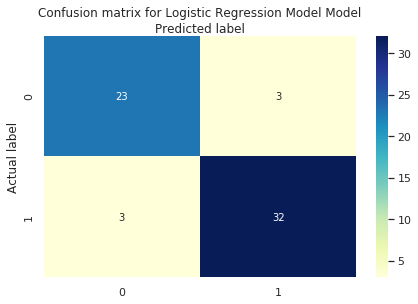

In [150]:
conf_matrixLR = confusion_matrix(y_test, y_predictLR)

print('Confusion Matrix:\n{}\n'.format(conf_matrixLR))
print('True Positive:\t{}'.format(conf_matrixLR[1,1]))
print('True Negative:\t{}'.format(conf_matrixLR[0,0]))
print('False Positive:\t{}'.format(conf_matrixLR[0,1]))
print('False Negative:\t{}'.format(conf_matrixLR[1,0]))

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(conf_matrixLR), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression Model Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### <a id=‘#’>Logistic Regression: Sensitivity and Specificity</a>

In [151]:
total=sum(sum(conf_matrixLR))

specificityLR = conf_matrixLR[0,0]/(conf_matrixLR[0,0]+conf_matrixLR[1,0])
print('Specificity : ', specificityLR)

sensitivityLR = conf_matrixLR[1,1]/(conf_matrixLR[1,1]+conf_matrixLR[0,1])
print('Sensitivity : ', sensitivityLR )

Specificity :  0.8846153846153846
Sensitivity :  0.9142857142857143


### <a id=‘#’>Logistic Regression: Reciever Operator Curve (ROC) and Area Under the Curve (AUC)</a>

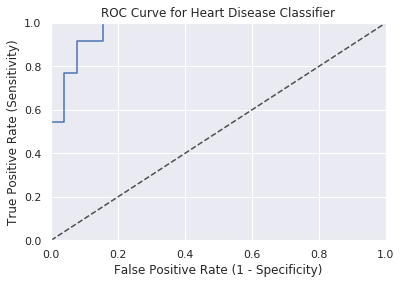

In [152]:
y_pred_quantLR = LR.predict_proba(X_test)[:, 1]

fprLR, tprLR, thresholdsLR = roc_curve(y_test, y_pred_quantLR)

fig, ax = plt.subplots()
ax.plot(fprLR, tprLR)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [153]:
aucLR=auc(fprLR, tprLR)
print("Area under the curve:", aucLR)

Area under the curve: 0.967032967032967


### <a id=‘#’>Logistic Regression: Precsion, Recall, and F1</a>

In [154]:
LRF1=metrics.f1_score(y_test,y_predictLR)
print(classification_report(y_test,y_predictLR))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.91      0.91      0.91        35

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### <a id=‘#’>Logistic Regression: Cross Validation and R2 Scores</a>

In [155]:
LRscores = cross_val_score(LR, X_scaled, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (LRscores.mean(), LRscores.std() * 2))

LRR2 = metrics.r2_score(y_test,y_predictLR)
print ('R2:', LRR2)

Accuracy: 0.84 (+/- 0.06)
R2: 0.5978021978021978


## <a id='#4.2'>4.2. K-Nearest Neighbors</a>

In [157]:
#seperate independent (feature) and dependent (target) variables
#KNN cannot process text/ categorical data unless they are be converted to numbers
#For this reason I did not input the heart3 DataFrame created above
X=heart2.drop('target',1)
y=heart2.loc[:,'target']

#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y,test_size=.2,random_state=40)

#Call classifier and, using GridSearchCV, find the best parameters
knn = KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}
modelKNN = GridSearchCV(knn,params,cv=10)
modelKNN.fit(X_train,y_train)
modelKNN.best_params_   

#Use the above model (modelKNN) to predict the y values corresponding to the X testing set
predictKNN = modelKNN.predict(X_test)

#Compare the results of the model's predictions (predictKNN) to the actual y values
accscoreKNN=accuracy_score(y_test,predictKNN)
print('Accuracy Score: ',accuracy_score(y_test,predictKNN))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predictKNN),5)*100,'%')


Accuracy Score:  0.9344262295081968
Using k-NN we get an accuracy score of:  93.443 %


### <a id=‘#’>KNN: Confusion Matrix</a>

Confusion Matrix:
[[23  3]
 [ 1 34]]

True Positive:	34
True Negative:	23
False Positive:	3
False Negative:	1


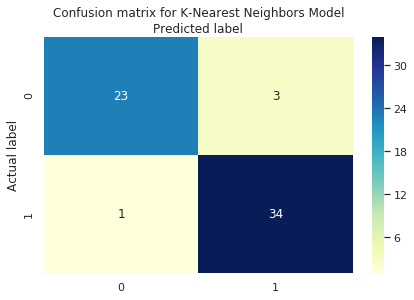

In [158]:
conf_matrixKNN = confusion_matrix(y_test,predictKNN)

print('Confusion Matrix:\n{}\n'.format(conf_matrixKNN))
print('True Positive:\t{}'.format(conf_matrixKNN[1,1]))
print('True Negative:\t{}'.format(conf_matrixKNN[0,0]))
print('False Positive:\t{}'.format(conf_matrixKNN[0,1]))
print('False Negative:\t{}'.format(conf_matrixKNN[1,0]))

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(conf_matrixKNN), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for K-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### <a id=‘#’>KNN: Sensitivity and Specificity</a>

In [159]:
total=sum(sum(conf_matrixKNN))

specificityKNN = conf_matrixKNN[0,0]/(conf_matrixKNN[0,0]+conf_matrixKNN[1,0])
print('Specificity : ', specificityKNN)

sensitivityKNN = conf_matrixKNN[1,1]/(conf_matrixKNN[1,1]+conf_matrixKNN[0,1])
print('Sensitivity : ', sensitivityKNN )

Specificity :  0.9583333333333334
Sensitivity :  0.918918918918919


### <a id=‘#’>KNN: ROC and AUC</a>

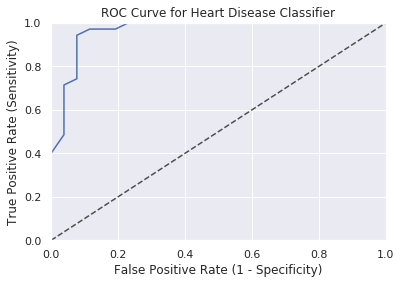

In [160]:
predictKNN_quant = modelKNN.predict_proba(X_test)[:, 1]

fprKNN, tprKNN, thresholds = roc_curve(y_test, predictKNN_quant)

fig, ax = plt.subplots()
ax.plot(fprKNN, tprKNN)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [161]:
aucKNN=auc(fprKNN, tprKNN)
print("Area under the curve:", aucKNN)

Area under the curve: 0.9637362637362638


### <a id=‘#’>KNN: Precsion, Recall, and F1</a>

In [162]:
KNNF1=metrics.f1_score(y_test,predictKNN)
print(classification_report(y_test,predictKNN))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.92      0.97      0.94        35

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



### <a id=‘#’>KNN: Cross Validation and R2 Scores</a>

In [163]:
KNNscores = cross_val_score(modelKNN, X_scaled, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (KNNscores.mean(), KNNscores.std() * 2))

KNNR2 = metrics.r2_score(y_test,predictKNN)
print ('R2:', KNNR2)

Accuracy: 0.81 (+/- 0.08)
R2: 0.7318681318681319


## <a id='#4.3'>4.3. Decision Tree</a>

In [164]:
X=heart2.drop('target',1)
y=heart2.loc[:,'target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y,test_size=.3,random_state=40)

dtree= DecisionTreeClassifier()
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}#

tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)
tree_model.fit(X_train,y_train)

#Printing best parameters selected through GridSearchCV

tree_model.best_params_
predictTREE = tree_model.predict(X_test)

accsocreTREE=accuracy_score(y_test,predictTREE)
print('Accuracy Score: ',accuracy_score(y_test,predictTREE))
print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(y_test,predictTREE),5)*100,'%')

Accuracy Score:  0.7692307692307693
Using Decision Tree we get an accuracy score of:  76.923 %


### <a id=‘#’>Decision Tree: Confusion Matrix</a>

Confusion Matrix:
[[30 10]
 [11 40]]

True Positive:	40
True Negative:	30
False Positive:	10
False Negative:	11


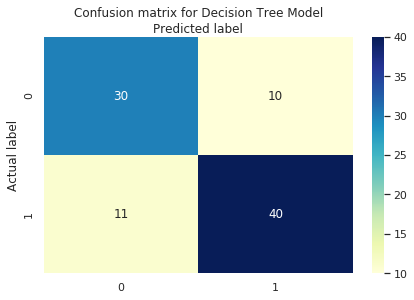

In [165]:
conf_matrixTREE = confusion_matrix(y_test, predictTREE)

print('Confusion Matrix:\n{}\n'.format(conf_matrixTREE))
print('True Positive:\t{}'.format(conf_matrixTREE[1,1]))
print('True Negative:\t{}'.format(conf_matrixTREE[0,0]))
print('False Positive:\t{}'.format(conf_matrixTREE[0,1]))
print('False Negative:\t{}'.format(conf_matrixTREE[1,0]))
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(conf_matrixTREE), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### <a id=‘#’> Decision Tree: Sensitivity and Specificity</a>

In [166]:
total=sum(sum(conf_matrixTREE))

specificityTREE = conf_matrixTREE[0,0]/(conf_matrixTREE[0,0]+conf_matrixTREE[1,0])
print('Specificity : ', specificityTREE)

sensitivityTREE = conf_matrixTREE[1,1]/(conf_matrixTREE[1,1]+conf_matrixTREE[0,1])
print('Sensitivity : ', sensitivityTREE )

Specificity :  0.7317073170731707
Sensitivity :  0.8


### <a id=‘#’>Decision Tree: ROC and AUC</a>

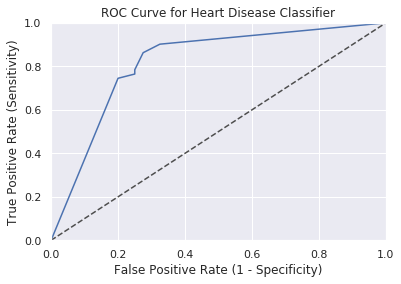

In [167]:
predictTREE_quant = tree_model.predict_proba(X_test)[:, 1]

fprTREE, tprTREE, thresholds = roc_curve(y_test, predictTREE_quant)

fig, ax = plt.subplots()
ax.plot(fprTREE, tprTREE)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [168]:
aucTREE=auc(fprTREE, tprTREE)
print("Area under the curve:", aucTREE)

Area under the curve: 0.8188725490196078


### <a id=‘#’>Decision Tree: Precision, Recall, and F1</a>

In [169]:
TREEF1=metrics.f1_score(y_test,predictTREE)
print(classification_report(y_test,predictTREE))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        40
           1       0.80      0.78      0.79        51

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



### <a id=‘#’>Decision Tree: Cross Validation and R2 Scores</a>

In [170]:
TREEscores = cross_val_score(tree_model, X_scaled, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (TREEscores.mean(), TREEscores.std() * 2))

TREER2 = metrics.r2_score(y_test,predictTREE)
print ('R2:', TREER2)

Accuracy: 0.74 (+/- 0.16)
R2: 0.06323529411764683


Yikes.  The Decision Tree model selected by GridSearchCV is *bad*.

R2 is defined as the proportion of the variance in the dependent variable that is predictable from the independent variable(s).  So, the closer to 1 the R2 value is, the better the model fits the data.
Furthermore, R2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R^2 is negative. 

Let's build a AdaBoost on top of the Decision Tree framework and see what happens.

## <a id='#4.4'>4.4. AdaBoost with Decision Tree Base</a>

In [171]:
X= heart2.drop('target',1)
y= heart2['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=.3,random_state=40)

modelABC = AdaBoostClassifier(base_estimator=dtree)
param_dist = {
 'n_estimators': [i for i in range(1,100)],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }

ABC = RandomizedSearchCV(AdaBoostClassifier(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

ABC.fit(X_train, y_train)
ABC.best_params_ 
y_predictABC = ABC.predict(X_test)


accscoreAB=accuracy_score(y_test,y_predictABC)
print('Using AdaBoost we get an accuracy score of: ',
      round(accuracy_score(y_test,y_predictABC),5)*100,'%')

Using AdaBoost we get an accuracy score of:  83.516 %


### <a id=‘#’>AdaBoost: Confusion Matrix</a>

Confusion Matrix:
[[33  7]
 [ 8 43]]

True Positive:	43
True Negative:	33
False Positive:	7
False Negative:	8


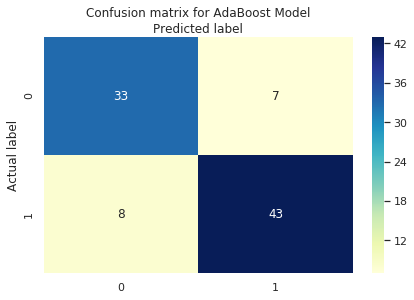

In [172]:
conf_matrixAB = confusion_matrix(y_test, y_predictABC)

print('Confusion Matrix:\n{}\n'.format(conf_matrixAB))
print('True Positive:\t{}'.format(conf_matrixAB[1,1]))
print('True Negative:\t{}'.format(conf_matrixAB[0,0]))
print('False Positive:\t{}'.format(conf_matrixAB[0,1]))
print('False Negative:\t{}'.format(conf_matrixAB[1,0]))

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(conf_matrixAB), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for AdaBoost Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### <a id=‘#’>AdaBoost: Sensitivity and Specificity</a>

In [173]:
total=sum(sum(conf_matrixAB))

specificityAB = conf_matrixAB[0,0]/(conf_matrixAB[0,0]+conf_matrixAB[1,0])
print('Specificity : ', specificityAB)

sensitivityAB = conf_matrixAB[1,1]/(conf_matrixAB[1,1]+conf_matrixAB[0,1])
print('Sensitivity : ', sensitivityAB )

Specificity :  0.8048780487804879
Sensitivity :  0.86


### <a id=‘#’>AdaBoost: ROC and AUC</a>

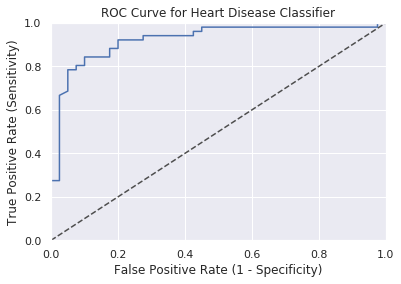

In [174]:
y_predABC_quant = ABC.predict_proba(X_test)[:, 1]

fprABC, tprABC, thresholds = roc_curve(y_test, y_predABC_quant)

fig, ax = plt.subplots()
ax.plot(fprABC, tprABC)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [175]:
aucAB=auc(fprABC, tprABC)
print("Area under the curve:", aucAB)

Area under the curve: 0.9227941176470588


### <a id=‘#’>AdaBoost: Precsion, Recall, and F1</a>

In [176]:
ABF1=metrics.f1_score(y_test,y_predictABC)
print(classification_report(y_test,y_predictABC))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        40
           1       0.86      0.84      0.85        51

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



### <a id=‘#’>AdaBoost: Cross Validation and R2 Scores</a>

In [177]:
ABscores = cross_val_score(ABC, X_scaled, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (ABscores.mean(), ABscores.std() * 2))

ABR2 = metrics.r2_score(y_test,y_predictABC)
print ('R2:', ABR2)

Accuracy: 0.83 (+/- 0.08)
R2: 0.3308823529411763


## <a id='#4.5'>4.5. Random Forest</a>

In [178]:
X= heart2.drop('target',1)
y= heart2['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=.3,random_state=40)

clf=RandomForestClassifier()
params = {'n_estimators':[i for i in range(1,100)]}
modelRF = GridSearchCV(clf,params,cv=10)
modelRF.fit(X_train,y_train)
modelRF.best_params_   

y_predCLF=modelRF.predict(X_test)

accscoreRF=accuracy_score(y_test,y_predCLF)
print('Using Random Forest we get an accuracy score of: ',
      round(accuracy_score(y_test,y_predCLF),5)*100,'%')

Using Random Forest we get an accuracy score of:  83.516 %


### <a id=‘#’>Random Forest: Confusion Matrix</a>

Confusion Matrix:
[[29 11]
 [ 4 47]]

True Positive:	47
True Negative:	29
False Positive:	11
False Negative:	4


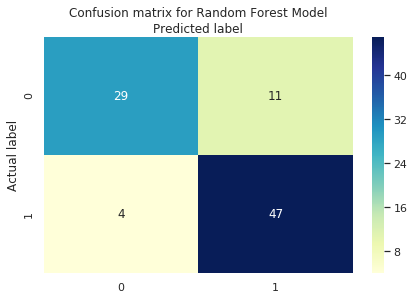

In [179]:
#y_predCLFH=modelRFH.predict(H_test)
conf_matrixRF = confusion_matrix(y_test, y_predCLF)

print('Confusion Matrix:\n{}\n'.format(conf_matrixRF))
print('True Positive:\t{}'.format(conf_matrixRF[1,1]))
print('True Negative:\t{}'.format(conf_matrixRF[0,0]))
print('False Positive:\t{}'.format(conf_matrixRF[0,1]))
print('False Negative:\t{}'.format(conf_matrixRF[1,0]))

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(conf_matrixRF), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### <a id=‘#’>Random Forest: Sensitivity and Specificity</a>

In [180]:
total=sum(sum(conf_matrixRF))

specificityRF = conf_matrixRF[0,0]/(conf_matrixRF[0,0]+conf_matrixRF[1,0])
print('Specificity : ', specificityRF)

sensitivityRF = conf_matrixRF[1,1]/(conf_matrixRF[1,1]+conf_matrixRF[0,1])
print('Sensitivity : ', sensitivityRF)

Specificity :  0.8787878787878788
Sensitivity :  0.8103448275862069


### <a id=‘#’>Random Forest: ROC and AUC</a>

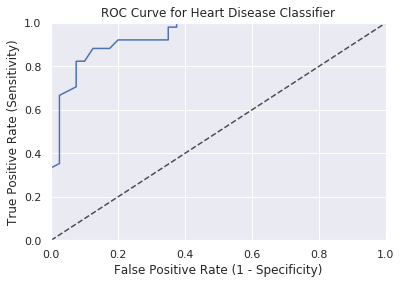

In [181]:
y_predCLF_quant = modelRF.predict_proba(X_test)[:, 1]

fprRF, tprRF, thresholds = roc_curve(y_test, y_predCLF_quant)

fig, ax = plt.subplots()
ax.plot(fprRF, tprRF)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [ ]:
aucRF=auc(fprRF, tprRF)
print("Area under the curve:", aucRF)

### <a id=‘#’>Random Forest: Precsion, Recall, and F1</a>

In [182]:
RFF1=metrics.f1_score(y_test,y_predCLF)
print(classification_report(y_test,y_predCLF))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        40
           1       0.81      0.92      0.86        51

    accuracy                           0.84        91
   macro avg       0.84      0.82      0.83        91
weighted avg       0.84      0.84      0.83        91



### <a id=‘#’>Random Forest: Cross Validation and R2 Scores</a>

In [183]:
RFscores = cross_val_score(modelRF, X_scaled, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (RFscores.mean(), RFscores.std() * 2))

RFR2 = metrics.r2_score(y_test,y_predCLF)
print ('Cross-Predicted Accuracy:', RFR2)

Accuracy: 0.82 (+/- 0.07)
Cross-Predicted Accuracy: 0.3308823529411763


## <a id='#4.6'>4.6. XGBoost</a>

In [184]:
X= heart2.drop('target',1)
y= heart2['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=.3,random_state=40)

param_dist = {
 'n_estimators': [i for i in range(1,100)],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }

XGB = RandomizedSearchCV(XGBClassifier(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

XGB.fit(X_train, y_train)
XGB.best_params_ 
y_predictXGB = XGB.predict(X_test)


accscoreXGB=accuracy_score(y_test,y_predictXGB)
print('Using XGBoost we get an accuracy score of: ',
      round(accuracy_score(y_test,y_predictXGB),5)*100,'%')

Using XGBoost we get an accuracy score of:  80.22 %


### <a id=‘#’>XGBoost: Confusion Matrix</a>

Confusion Matrix:
[[28 12]
 [ 6 45]]

True Positive:	45
True Negative:	28
False Positive:	12
False Negative:	6


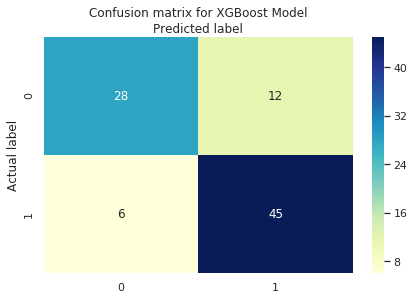

In [185]:
conf_matrixXGB = confusion_matrix(y_test, y_predictXGB)

print('Confusion Matrix:\n{}\n'.format(conf_matrixXGB))
print('True Positive:\t{}'.format(conf_matrixXGB[1,1]))
print('True Negative:\t{}'.format(conf_matrixXGB[0,0]))
print('False Positive:\t{}'.format(conf_matrixXGB[0,1]))
print('False Negative:\t{}'.format(conf_matrixXGB[1,0]))

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(conf_matrixXGB), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for XGBoost Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### <a id=‘#’>XGBoost: Sensitivity and Specificity</a>

In [186]:
total=sum(sum(conf_matrixXGB))

specificityXGB = conf_matrixXGB[0,0]/(conf_matrixXGB[0,0]+conf_matrixXGB[1,0])
print('Specificity : ', specificityXGB)

sensitivityXGB = conf_matrixXGB[1,1]/(conf_matrixXGB[1,1]+conf_matrixXGB[0,1])
print('Sensitivity : ', sensitivityXGB)

Specificity :  0.8235294117647058
Sensitivity :  0.7894736842105263


### <a id=‘#’>XGBoost: ROC and AUC</a>

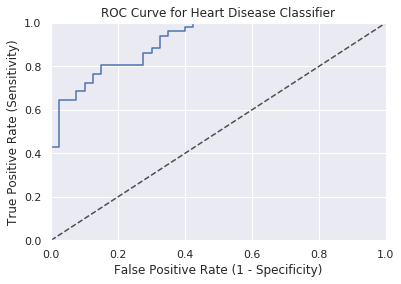

In [187]:
y_predXGB_quant = XGB.predict_proba(X_test)[:, 1]

fprXGB, tprXGB, thresholds = roc_curve(y_test, y_predXGB_quant)

fig, ax = plt.subplots()
ax.plot(fprXGB, tprXGB)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [188]:
aucXGB=auc(fprXGB, tprXGB)
print("Area under the curve:", aucXGB)

Area under the curve: 0.9127450980392157


### <a id=‘#’>XGBoost: Precsion, Recall, and F1</a>

In [189]:
XGF1=metrics.f1_score(y_test,y_predictXGB)
print(classification_report(y_test,y_predictXGB))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        40
           1       0.79      0.88      0.83        51

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.80      0.80      0.80        91



### <a id=‘#’>XGBoost: Cross Validation Scores/ R2 Scores</a>

In [190]:
XGscores = cross_val_score(XGB, X_scaled, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (XGscores.mean(), XGscores.std() * 2))

XGR2 = metrics.r2_score(y_test,y_predictXGB)
print ('Cross-Predicted Accuracy:', XGR2)

Accuracy: 0.82 (+/- 0.06)
Cross-Predicted Accuracy: 0.19705882352941162


# <a id=‘#5’>5. Comparing the Models</a>

We just went thorugh 6 models very fast.  Let's compare them to see which predicted the best results for our data.

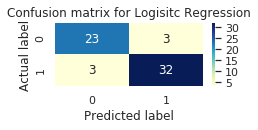

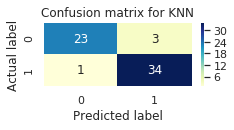

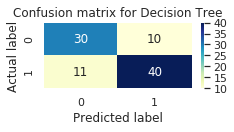

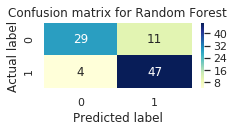

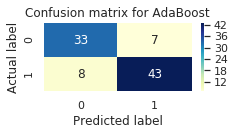

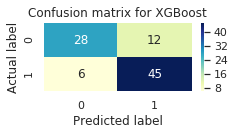

In [195]:
plt.subplot(3,2,1)
sns.heatmap(pd.DataFrame(conf_matrixLR), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitc Regression', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

plt.subplot(3,2,2)
sns.heatmap(pd.DataFrame(conf_matrixKNN), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for KNN', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

plt.subplot(3,2,3)
sns.heatmap(pd.DataFrame(conf_matrixTREE), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

plt.subplot(3,2,4)
sns.heatmap(pd.DataFrame(conf_matrixRF), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

plt.subplot(3,2,5)
sns.heatmap(pd.DataFrame(conf_matrixAB), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for AdaBoost', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

plt.subplot(3,2,6)
sns.heatmap(pd.DataFrame(conf_matrixXGB), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for XGBoost', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



This visualization is helpful, but it still does not reall tell us which model would be the best to base our findings off of. 

In [196]:
comparisons=pd.DataFrame()
comparisons.loc["Logistic Regression","Accuracy"]=accscoreLR
comparisons.loc["Logistic Regression","Sensitivity"]=sensitivityLR
comparisons.loc["Logistic Regression","Specificity"]=specificityLR
comparisons.loc["Logistic Regression","F1"]=LRF1
comparisons.loc["Logistic Regression","Area Under the Curve"]=aucLR
comparisons.loc["Logistic Regression","Cross Validation Accuracy"]=LRscores.mean()
comparisons.loc["Logistic Regression","R2"]=LRR2

comparisons.loc["KNN","Accuracy"]=accscoreKNN
comparisons.loc["KNN","Sensitivity"]=sensitivityKNN
comparisons.loc["KNN","Specificity"]=specificityKNN
comparisons.loc["KNN","F1"]=KNNF1
comparisons.loc["KNN","Area Under the Curve"]=aucKNN
comparisons.loc["KNN","Cross Validation Accuracy"]=KNNscores.mean()
comparisons.loc["KNN","R2"]=KNNR2

comparisons.loc["Decision Tree","Accuracy"]=accsocreTREE
comparisons.loc["Decision Tree","Sensitivity"]=sensitivityTREE
comparisons.loc["Decision Tree","Specificity"]=specificityTREE
comparisons.loc["Decision Tree","F1"]=TREEF1
comparisons.loc["Decision Tree","Area Under the Curve"]=aucTREE
comparisons.loc["Decision Tree","Cross Validation Accuracy"]=TREEscores.mean()
comparisons.loc["Decision Tree","R2"]=TREER2

comparisons.loc["AdaBoost","Accuracy"]=accscoreAB
comparisons.loc["AdaBoost","Sensitivity"]=sensitivityAB
comparisons.loc["AdaBoost","Specificity"]=specificityAB
comparisons.loc["AdaBoost","F1"]=ABF1
comparisons.loc["AdaBoost","Area Under the Curve"]=aucAB
comparisons.loc["AdaBoost","Cross Validation Accuracy"]=ABscores.mean()
comparisons.loc["AdaBoost","R2"]=ABR2

comparisons.loc["Random Forest","Accuracy"]=accscoreRF
comparisons.loc["Random Forest","Sensitivity"]=sensitivityRF
comparisons.loc["Random Forest","Specificity"]=specificityRF
comparisons.loc["Random Forest","F1"]=RFF1
comparisons.loc["Random Forest","Area Under the Curve"]=aucRF
comparisons.loc["Random Forest","Cross Validation Accuracy"]=RFscores.mean()
comparisons.loc["Random Forest","R2"]=RFR2

comparisons.loc["XGBoost","Accuracy"]=accscoreXGB
comparisons.loc["XGBoost","Sensitivity"]=sensitivityXGB
comparisons.loc["XGBoost","Specificity"]=specificityXGB
comparisons.loc["XGBoost","F1"]=XGF1
comparisons.loc["XGBoost","Area Under the Curve"]=aucXGB
comparisons.loc["XGBoost","Cross Validation Accuracy"]=XGscores.mean()
comparisons.loc["XGBoost","R2"]=XGR2


def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

compare=comparisons.style.apply(highlight_max)
compare

,Accuracy,Sensitivity,Specificity,F1,Area Under the Curve,Cross Validation Accuracy,R2
Logistic Regression,0.901639,0.914286,0.884615,0.914286,0.967033,0.837462,0.597802
KNN,0.934426,0.918919,0.958333,0.944444,0.963736,0.814346,0.731868
Decision Tree,0.769231,0.8,0.731707,0.792079,0.818873,0.744223,0.0632353
AdaBoost,0.835165,0.86,0.804878,0.851485,0.922794,0.827351,0.330882
Random Forest,0.835165,0.810345,0.878788,0.862385,0.930882,0.824129,0.330882
XGBoost,0.802198,0.789474,0.823529,0.833333,0.912745,0.824404,0.197059


Wow.  K-Nearest Neighbors has the highest Accuracy, Sensivity, Specificity, F1, and R2.  It is also a close second for Area Under the Curve and within .02 of the most cross-validated model.  In the next section of this study I will further examine the results k-nearest neighbors gave and what it indicates for predicting heart disease.

The cross validation and R2 scores exemplifiy that one score with a set random seed will not always represent how good a fit the model is for the data.

Let's Take a deeper look at the KNN Model

## <a id=‘#5.1’>5.1. Assesing the Model of Best Fit</a>

### <a id=‘#’>Elbow Method</a>

Using Elbow Method to find the most efficient K value.  We alreadly used GridSearchCV to select the 'best parameters', but it is always good to examine the chosen parameters.

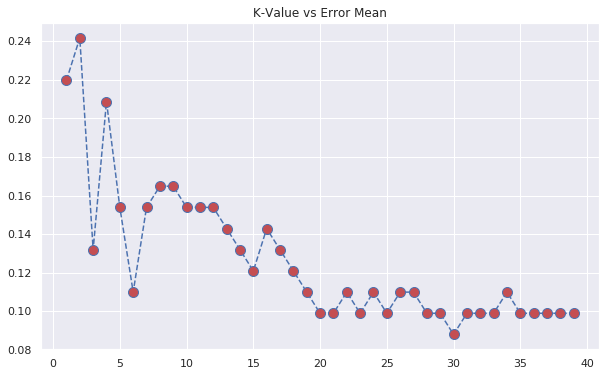

In [197]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o', linestyle='dashed',color='b',markerfacecolor='r', markersize=10)
plt.title('K-Value vs Error Mean')
plt.show()

In [198]:
modelKNN.best_params_   

{'n_neighbors': 27}

That seems reasonable.  Go to the next section for a more indepth analysis of the results of the KNN model.

# <a id=‘#6’>6. Note About One Hot Encoding</a>

In theory, one hot encoding helps Machiene Learning algorithms better process data by maping all categorical data to binary vectors.  

For example, if your hypothetical column, "bean type", had 3 values (1, 2, 3) it would convert the one column into three new columns as follows:



In [199]:
Default=pd.DataFrame()
Default.loc["1","Type"]=1
Default.loc["2","Type"]=2
Default.loc["3","Type"]=3

After_OneHot=pd.DataFrame()
After_OneHot.loc[:,"Type1"]=Default.loc[:,"Type"].apply(lambda x: 1 if x==1 else 0)
After_OneHot.loc[:,"Type2"]=Default.loc[:,"Type"].apply(lambda x: 1 if x==2 else 0)
After_OneHot.loc[:,"Type3"]=Default.loc[:,"Type"].apply(lambda x: 1 if x==3 else 0)

print("Before --> After One Hot Encoding")
multi_table([Default, After_OneHot])

Before --> After One Hot Encoding


I ran all six models with and without One Hot Encoding. The code and results follow:

In order to determine if One Hot Encoding improves the accuracy of my predictive model, I am going to save made a new DataFrame, H.  For refrence:

*Dependent Variables*
   * H: One Hot encoded X values
   * X: Non- One Hot encoded X values
     
*Independent Variable*
* y: Target values 

In [200]:
heart4=pd.DataFrame.copy(heart2)
heart4.loc[:,"sex_female"]=heart4.loc[:,"sex"].apply(lambda x: 0 if x==1 else 1)
heart4.loc[:,"CP_Asymptomatic"]=heart4.loc[:,"cpain"].apply(lambda x: 1 if x==0 else 0)
heart4.loc[:,"CP_TypicalAng"]=heart4.loc[:,"cpain"].apply(lambda x: 1 if x==1 else 0)
heart4.loc[:,"CP_AtypicalAng"]=heart4.loc[:,"cpain"].apply(lambda x: 1 if x==2 else 0)
heart4.loc[:,"CP_NonAnginal"]=heart4.loc[:,"cpain"].apply(lambda x: 1 if x==3 else 0)
heart4.loc[:,"BSLT120"]=heart4.loc[:,"fasting_BS"].apply(lambda x: 1 if x==0 else 0)
heart4.loc[:,"EKG_Normal"]=heart4.loc[:,"resting_EKG"].apply(lambda x: 1 if x==0 else 0)
heart4.loc[:,"EKG_LVH"]=heart4.loc[:,"resting_EKG"].apply(lambda x: 1 if x==1 else 0)
heart4.loc[:,"EKG_STT"]=heart4.loc[:,"resting_EKG"].apply(lambda x: 1 if x==2 else 0)
heart4.loc[:,"ExerciseANG_No"]=heart4.loc[:,"exercise_ANG"].apply(lambda x: 1 if x==0 else 0)
heart4.loc[:,"STUpsloping"]=heart4.loc[:,"m_exercise_ST"].apply(lambda x: 1 if x==0 else 0)
heart4.loc[:,"STFlat"]=heart4.loc[:,"m_exercise_ST"].apply(lambda x: 1 if x==1 else 0)
heart4.loc[:,"STDownsloping"]=heart4.loc[:,"m_exercise_ST"].apply(lambda x: 1 if x==2 else 0)
heart4.loc[:,"STABNNormal"]=heart4.loc[:,"ST_depressionAB"].apply(lambda x: 1 if x==0 else 0)

heart4= heart4.drop('cpain',axis=1)
heart4= heart4.drop('m_exercise_ST',axis=1)
heart4= heart4.drop('resting_EKG',axis=1)
heart4=heart4[['age', 'sex','sex_female', 'CP_Asymptomatic', 'CP_TypicalAng', 'CP_AtypicalAng',
              'CP_NonAnginal', 'resting_BP', 'chol', 'fasting_BS', 'BSLT120', 'EKG_Normal',
              'EKG_LVH', 'EKG_STT', 'max_HR', 'ExerciseANG_No','exercise_ANG', 'ST_depression',
              'STUpsloping', 'STFlat', 'STDownsloping','ST_depressionAB', 'STABNNormal', 
               'no_maj_vessels', 'thal']]
heart4.columns=['Age', 'Sex_Male','Sex_Female', 'CP_Asymptomatic', 'CP_TypicalAng', 'CP_AtypicalAng',
              'CP_NonAnginal', 'Resting_BP', 'Chol', 'BSMT120', 'BSLT120', 'EKG_Normal',
              'EKG_LVH', 'EKG_STT', 'max_HR', 'ExerciseANG_No','ExerciseANG_Yes', 'ST_Depression',
              'STUpsloping', 'STFlat', 'STDownsloping','ST_depressionAB', 'STABNNormal',
             '#Major_Vessels', 'Thalium_ST']

H=heart4
X=heart2.drop('target',1)
y=heart2.loc[:,'target']

First 5 lines of One Hot encoded dataframe:

In [201]:
H.head()

,Age,Sex_Male,Sex_Female,CP_Asymptomatic,CP_TypicalAng,CP_AtypicalAng,CP_NonAnginal,Resting_BP,Chol,BSMT120,BSLT120,EKG_Normal,EKG_LVH,EKG_STT,max_HR,ExerciseANG_No,ExerciseANG_Yes,ST_Depression,STUpsloping,STFlat,STDownsloping,ST_depressionAB,STABNNormal,#Major_Vessels,Thalium_ST
0,63,1,0,0,0,0,1,145,233,1,0,1,0,0,150,1,0,2.3,1,0,0,1,0,0,1.0
1,37,1,0,0,0,1,0,130,250,0,1,0,1,0,187,1,0,3.5,1,0,0,1,0,0,2.0
2,41,0,1,0,1,0,0,130,204,0,1,1,0,0,172,1,0,1.4,0,0,1,1,0,0,2.0
3,56,1,0,0,1,0,0,120,236,0,1,0,1,0,178,1,0,0.8,0,0,1,1,0,0,2.0
4,57,0,1,1,0,0,0,120,354,0,1,0,1,0,163,0,1,0.6,0,0,1,1,0,0,2.0


In the below code I ran and analyzed the accuracy of all 6 examined models.

In [202]:
H=heart4
y=heart2.loc[:,'target']
scaler = StandardScaler()
H_scaled = scaler.fit_transform(H)
H_train,H_test,y_train,y_test = train_test_split(H_scaled,y,test_size=.2,random_state=40)

#Logisitc Regression
LRH = LogisticRegression(C=0.01, solver='liblinear').fit(H_train,y_train)
y_predictLRH = LRH.predict(H_test)
accscoreLRH=accuracy_score(y_test,y_predictLRH)
LRHscores = cross_val_score(LRH, H_scaled, y, cv=5)
LRHR2 = metrics.r2_score(y_test,y_predictLRH)


#KNN
knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}
modelKNNH = GridSearchCV(knn,params,cv=10)
modelKNNH.fit(H_train,y_train)
modelKNNH.best_params_   
predictKNNH = modelKNNH.predict(H_test)
accscoreKNNH=accuracy_score(y_test,predictKNNH)
KNNHscores = cross_val_score(modelKNNH, H_scaled, y, cv=5)
KNNHR2 = metrics.r2_score(y_test,predictKNNH)

#Decision Tree
dtreeH= DecisionTreeClassifier()
paramsH = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}#
tree_modelH = GridSearchCV(dtreeH, param_grid=paramsH, n_jobs=-1)
tree_modelH.fit(H_train,y_train)
tree_modelH.best_params_
predictTREEH = tree_modelH.predict(H_test)
accscoreTREEH=accuracy_score(y_test,predictTREEH)
TREEHscores = cross_val_score(tree_modelH, H_scaled, y, cv=5)
TREEHR2 = metrics.r2_score(y_test, predictTREEH)

#AdaBoost with Decision Tree Base
modelABCH = AdaBoostClassifier(base_estimator=dtree)
param_distH = {
 'n_estimators': [i for i in range(1,100)],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }
ABCH = RandomizedSearchCV(AdaBoostClassifier(), param_distributions = param_distH, cv=3, n_iter = 10,n_jobs=-1)
ABCH.fit(H_train, y_train)
ABCH.best_params_ 
y_predictABCH = ABCH.predict(H_test)
accscoreABH=accuracy_score(y_test,y_predictABCH)
ABHscores = cross_val_score(ABCH, H_scaled, y, cv=5)
ABHR2 = metrics.r2_score(y_test, y_predictABCH)

#Random Forest
clfH=RandomForestClassifier()
paramsH = {'n_estimators':[i for i in range(1,100)]}
modelRFH = GridSearchCV(clfH,paramsH,cv=10)
modelRFH.fit(H_train,y_train)
modelRFH.best_params_   
y_predCLFH=modelRFH.predict(H_test)
accscoreRFH=accuracy_score(y_test,y_predCLFH)
RFHscores = cross_val_score(modelRFH, H_scaled, y, cv=5)
RFHR2 = metrics.r2_score(y_test, y_predCLFH)

#XGBoost
param_distH = {
 'n_estimators': [i for i in range(1,100)],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }
XGBH = RandomizedSearchCV(XGBClassifier(),param_distributions = param_distH, cv=3, n_iter = 10,n_jobs=-1)
XGBH.fit(H_train, y_train)
XGBH.best_params_ 
y_predictXGBH = XGBH.predict(H_test)
accscoreXGBH=accuracy_score(y_test,y_predictXGBH)
XGHscores = cross_val_score(XGBH, H_scaled, y, cv=5)
XGHR2 = metrics.r2_score(y_test, y_predictXGBH)

In [203]:
Accuracy=pd.DataFrame()
Accuracy.loc["Logistic Regression Accuracy","One Hot Encoded"]=accscoreLRH
Accuracy.loc["Logistic Regression Accuracy","Unaltered"]=accscoreLR
Accuracy.loc["KNN Accuracy","One Hot Encoded"]=accscoreKNNH
Accuracy.loc["KNN Accuracy","Unaltered"]=accscoreKNN
Accuracy.loc["Decision Tree Accuracy","One Hot Encoded"]=accscoreTREEH
Accuracy.loc["Decision Tree Accuracy","Unaltered"]=accsocreTREE
Accuracy.loc["AdaBoost Accuracy","One Hot Encoded"]=accscoreABH
Accuracy.loc["AdaBoost Accuracy","Unaltered"]=accscoreAB
Accuracy.loc["Random Forest Accuracy","One Hot Encoded"]=accscoreRFH
Accuracy.loc["Random Forest Accuracy","Unaltered"]=accscoreRF
Accuracy.loc["XGBoost Accuracy","One Hot Encoded"]=accscoreXGBH
Accuracy.loc["XGBoost Accuracy","Unaltered"]=accscoreXGB

Accuracy=Accuracy.T
Accuracy.style.apply(highlight_max)

,Logistic Regression Accuracy,KNN Accuracy,Decision Tree Accuracy,AdaBoost Accuracy,Random Forest Accuracy,XGBoost Accuracy
One Hot Encoded,0.918033,0.885246,0.786885,0.901639,0.868852,0.786885
Unaltered,0.901639,0.934426,0.769231,0.835165,0.835165,0.802198


In [204]:
CVA=pd.DataFrame()
CVA.loc["Logistic Regression CVA","One Hot Encoded"]=LRHscores.mean()
CVA.loc["Logistic Regression CVA","Unaltered"]=LRscores.mean()
CVA.loc["KNN CVA","One Hot Encoded"]=KNNHscores.mean()
CVA.loc["KNN CVA","Unaltered"]=KNNscores.mean()
CVA.loc["Decision Tree CVA","One Hot Encoded"]=TREEHscores.mean()
CVA.loc["Decision Tree CVA","Unaltered"]=TREEscores.mean()
CVA.loc["AdaBoost CVA","One Hot Encoded"]=ABHscores.mean()
CVA.loc["AdaBoost CVA","Unaltered"]=ABscores.mean()
CVA.loc["Random Forest CVA","One Hot Encoded"]=RFHscores.mean()
CVA.loc["Random Forest CVA","Unaltered"]=RFscores.mean()
CVA.loc["XGBoost Accuracy CVA","One Hot Encoded"]=XGHscores.mean()
CVA.loc["XGBoost Accuracy CVA","Unaltered"]=XGscores.mean()

CVA=CVA.T
CVA.style.apply(highlight_max)

,Logistic Regression CVA,KNN CVA,Decision Tree CVA,AdaBoost CVA,Random Forest CVA,XGBoost Accuracy CVA
One Hot Encoded,0.81757,0.801178,0.745173,0.830796,0.830907,0.817847
Unaltered,0.837462,0.814346,0.744223,0.827351,0.824129,0.824404


In [205]:
R2=pd.DataFrame()
R2.loc["Logistic Regression R2","One Hot Encoded"]=LRHR2
R2.loc["Logistic Regression R2","Unaltered"]=LRR2
R2.loc["KNN R2","One Hot Encoded"]=KNNHR2
R2.loc["KNN R2","Unaltered"]=KNNR2
R2.loc["Decision Tree R2","One Hot Encoded"]=TREEHR2
R2.loc["Decision Tree R2","Unaltered"]=TREER2
R2.loc["AdaBoost R2","One Hot Encoded"]=ABHR2
R2.loc["AdaBoost R2","Unaltered"]=ABR2
R2.loc["Random Forest R2","One Hot Encoded"]=RFHR2
R2.loc["Random Forest R2","Unaltered"]=RFR2
R2.loc["XGBoost Accuracy R2","One Hot Encoded"]=XGHR2
R2.loc["XGBoost Accuracy R2","Unaltered"]=XGR2

R2=R2.T
R2.style.apply(highlight_max)

,Logistic Regression R2,KNN R2,Decision Tree R2,AdaBoost R2,Random Forest R2,XGBoost Accuracy R2
One Hot Encoded,0.664835,0.530769,0.128571,0.597802,0.463736,0.128571
Unaltered,0.597802,0.731868,0.0632353,0.330882,0.330882,0.197059


As you can see, the difference between the accuracies, cross-validated accuracies, and R2's of the one hot encoded samples and unaltered samples is very small.  For this reason, as well as the fact that these tests were run solely to pick the best model for my data, I did not include further analysis of the one hot encoded dataframe (confusion matricies, etc.).

# <a id=‘#’>FIN</a>